In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as mtick
import warnings
warnings.simplefilter(action="ignore", category=(FutureWarning,UserWarning))



In [148]:
# Считываем данные из csv-файла и выводим первые строки
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Описание признаков:
1.     RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2.     CustomerId — идентификатор клиента
3.     Surname — фамилия клиента
4.     CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5.     Geography — страна клиента (банк международный)
6.     Gender — пол клиента
7.     Age — возраст клиента
8.     Tenure — сколько лет клиент пользуется услугами банка
9.     Balance — баланс на счетах клиента в банке
10.     NumOfProducts — количество услуг банка, которые приобрёл клиент
11.     HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12.     IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13.     EstimatedSalary — предполагаемая заработная плата клиента
14.     Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)


## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

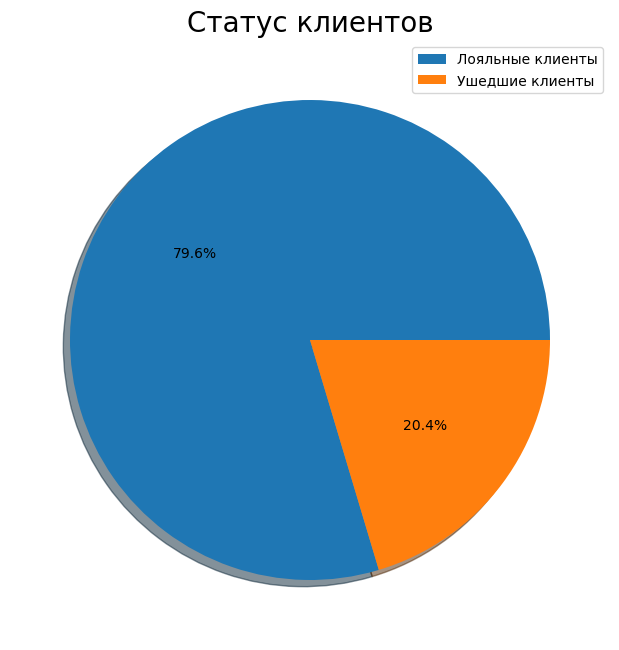

In [149]:
# Преобразую значения в столбце Exited из 1, 0 в Ушедшие клиенты, Лояльные клиенты для большей наглядности
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 'Лояльные клиенты' if x==0 else 'Ушедшие клиенты')
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,2,2])
# Вывожу круговую диаграмму
ax.pie(churn_data['Exited'].value_counts(), autopct='%1.1f%%',shadow=True,radius=1)
# Подписываю название графика
plt.title('Статус клиентов', fontsize = 20)
# Вывожу легенду
plt.legend(churn_data['Exited'].value_counts().index)
plt.show()

### Выводы по графику:
Из банка ушла 1/5 часть клиентов. 

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

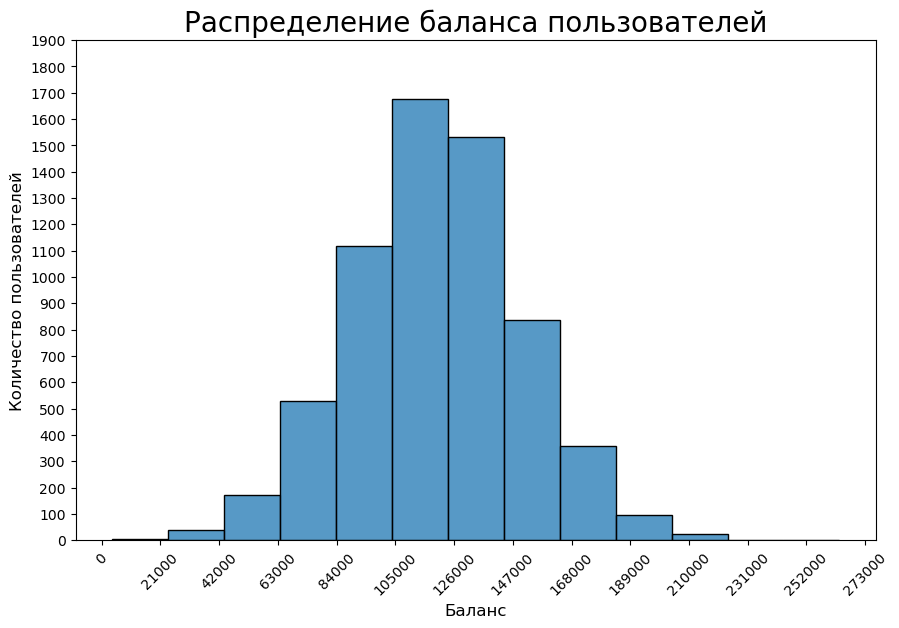

In [150]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
# Строю гистограмму
sns.histplot(churn_data[churn_data['Balance']>2500]['Balance'],binwidth=20000,bins=24)
# Подписываю оси
plt.ylabel('Количество пользователей', fontsize = 12)
plt.xlabel('Баланс', fontsize = 12)
# Корректирую количество делений по оси X и поворачиваю, чтобы текс не наезжал.
ax.xaxis.set_ticks(range(0,275000,21000))
ax.xaxis.set_tick_params(labelrotation = 45)
# Тоже с Y
ax.yaxis.set_ticks(range(0,2000,100))
ax.set_title('Распределение баланса пользователей',fontsize = 20)
plt.show()



### Выводы по графику:
Большая часть клиентов хранит на счету от 83 до 160 тыс. Распределение близко к нормальному.

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

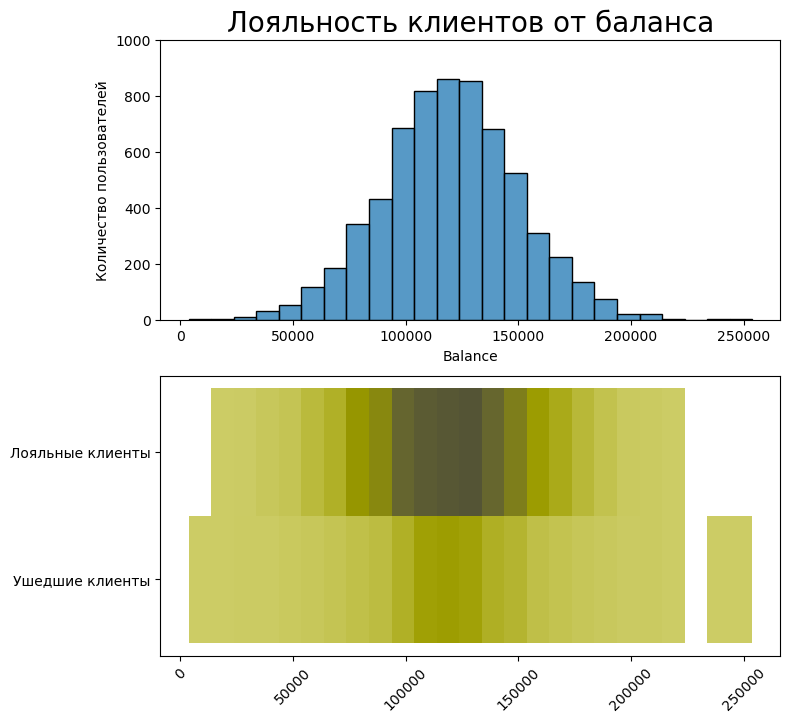

In [151]:
# Строю 2 гистограммы
fig,axis= plt.subplots(nrows=2,ncols=1,figsize =(8,8))
#Расстояние между гистограммами по высоте
plt.subplots_adjust(hspace=.2)
# Первая показывает распределение баланса пользователей
h_plot_1 = sns.histplot(churn_data[churn_data['Balance']>2500],x='Balance',binwidth=10000,ax=axis[0])
# Вторая показывает зависимость баланса от лояльности
h_plot_2 = sns.histplot(churn_data[churn_data['Balance']>2500],x='Balance',y = 'Exited', binwidth=10000,ax=axis[1],color='yellow')
h_plot_1.set_ylabel('Количество пользователей')
h_plot_2.set_ylabel('')
h_plot_2.set_xlabel('')
h_plot_2.xaxis.set_tick_params(labelrotation = 45)
h_plot_1.yaxis.set_ticks(range(0,1200,200))
h_plot_1.set_title('Лояльность клиентов от баланса',fontsize = 20)
plt.show()

### Выводы по графику:
В интервале от 100 до 150 тыс, колличество клиентов растет вне зависимости от лояльности (разница в соотношении текущих/ушедших). По краям (<40000 и >200000) соотношение становится примерно равным. А минимальный и максимальный баланс прослеживается, только у ушедших клиентов. Возможно клиентов не устраивает процентная стака банка.

#### Попробуем захватить данные по клиентам с нулевым балансом

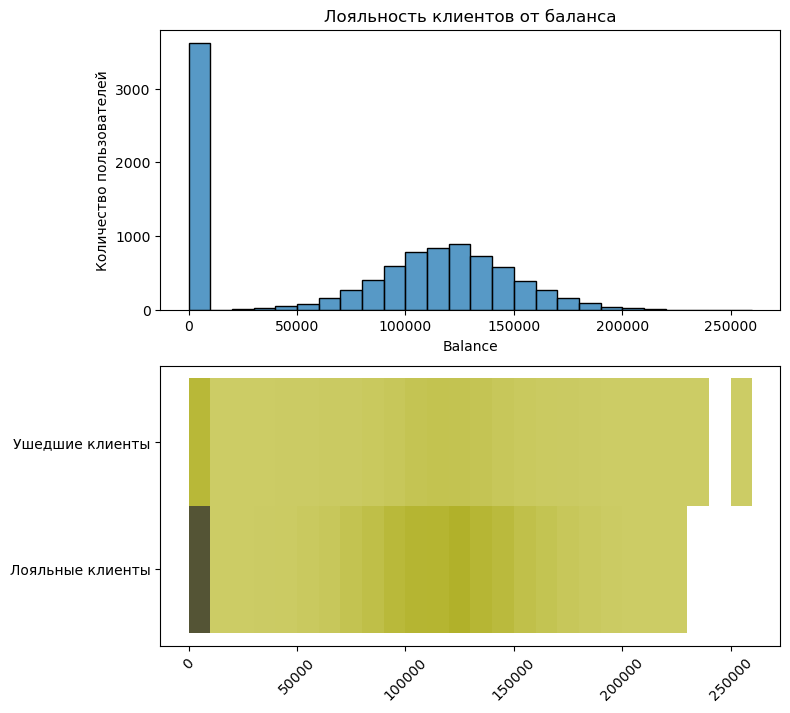

In [152]:
#Все тоже самое, что и раньше только по всей таблице
fig,axis= plt.subplots(nrows=2,ncols=1,figsize =(8,8))
plt.subplots_adjust(hspace=.2)
h_plot_1 = sns.histplot(churn_data,x='Balance',binwidth=10000,ax=axis[0])
h_plot_2 = sns.histplot(churn_data,x='Balance',y = 'Exited', binwidth=10000,ax=axis[1],color='yellow')
h_plot_1.set_ylabel('Количество пользователей')
h_plot_2.set_ylabel('Количество пользователей')
h_plot_2.set_ylabel('')
h_plot_2.set_xlabel('')
# h_plot_2.xaxis.set_ticks(range(0,275000,30000))
h_plot_2.xaxis.set_tick_params(labelrotation = 45)
h_plot_1.yaxis.set_ticks(range(0,4000,1000))
h_plot_1.set_title('Лояльность клиентов от баланса')
plt.show()

### Выводы по графику:
Видно, что очень много клиентов имеют нулевой баланс и в основном это активные клиенты. Можно сделать вывод, что на самом деле количество ушедших клиентов значительно больше, просто срок действия карт не истек, но услугами банка они не пользуются.

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

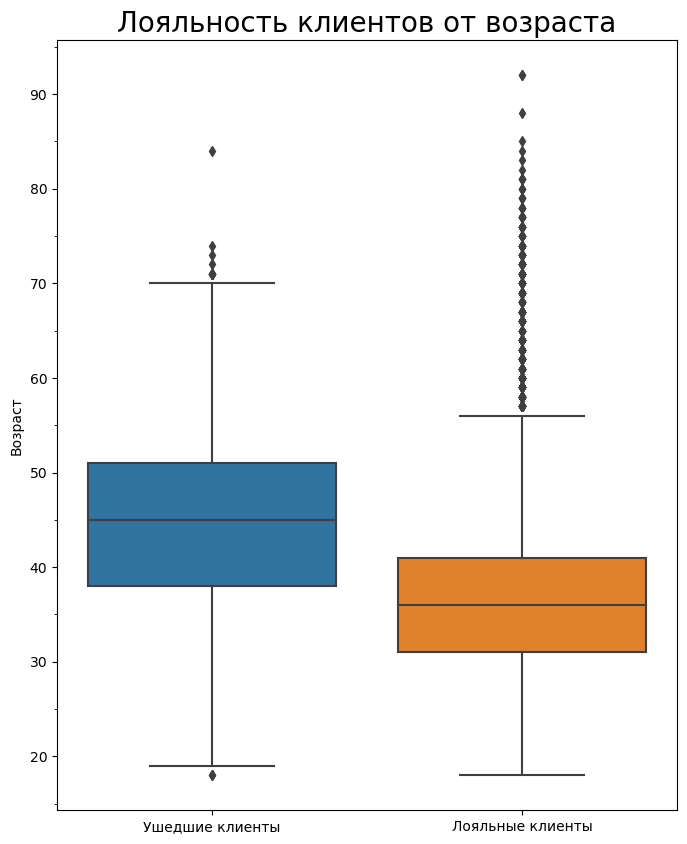

In [153]:
fig,axis = plt.subplots(figsize=(8,10))
sns.boxplot(data= churn_data,x = churn_data['Exited'],y = churn_data['Age'])
axis.set_xlabel('')
axis.set_ylabel('Возраст')
axis.set_title('Лояльность клиентов от возраста',fontsize=20)
axis.yaxis.set_major_locator(MultipleLocator(10))
axis.yaxis.set_minor_locator(MultipleLocator(5))

### Выводы по графику:
Банку стоит обратить внимание на возрастную группу от 38 до 51 года и запустить промо-компанию ориентированную на людей старшего возраста. Лояльные клиенты находятся в возрастной группе от 31 до 41 и имеют больше потенциальных выбросов. Однако, так как в банке требуется предоставлять паспорт и данные заполняет сотрудник, а не клиент и информация проходит проверку, то вероятность неправильно введенных данных сводится к минимуму.

## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

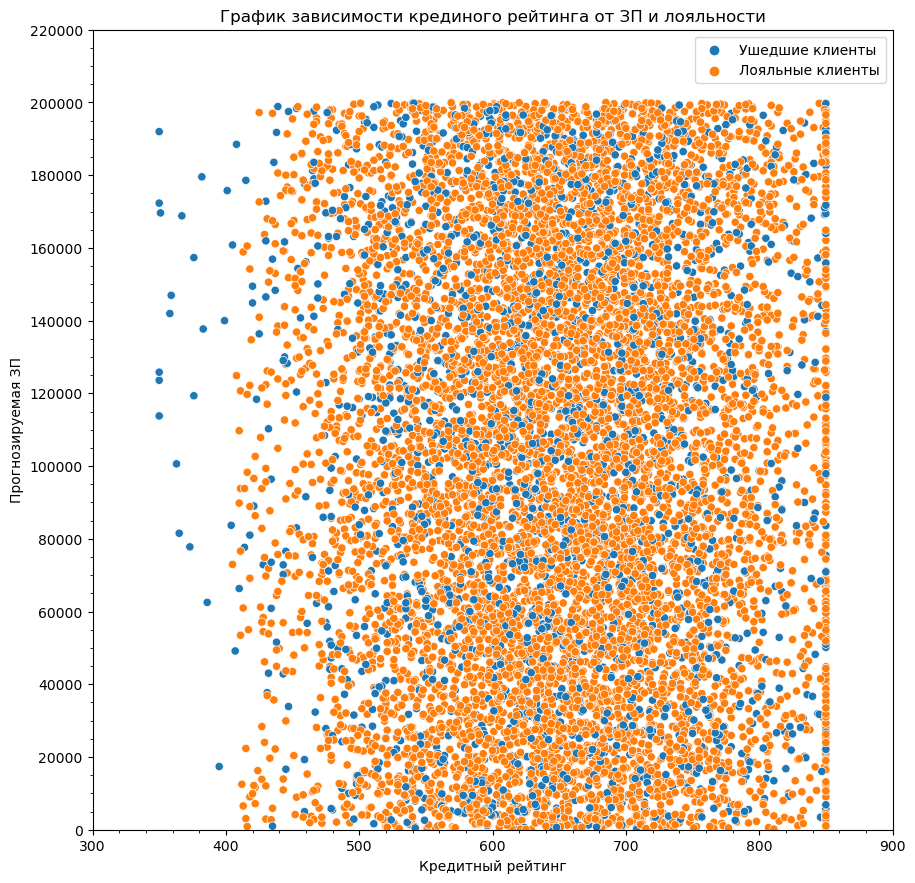

In [154]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0,0,1,1])
sns.scatterplot('CreditScore', 'EstimatedSalary',hue = 'Exited', data=churn_data)
axis.set_xlabel('Кредитный рейтинг')
axis.set_ylabel('Прогнозируемая ЗП')
axis.set_title('График зависимости крединого рейтинга от ЗП и лояльности')
axis.legend()
# Меняю деления
axis.xaxis.set_major_locator(MultipleLocator(100))
axis.yaxis.set_major_locator(MultipleLocator(20000))
axis.yaxis.set_minor_locator(AutoMinorLocator())
axis.xaxis.set_minor_locator(AutoMinorLocator())
#Устанавливаю пределы, так чтобы легенда не наезжала на график 
axis.set_ylim(0,220000)
axis.set_xlim(300,900)
fig.show()


### Выводы по графику:
По графику нет прямой зависимости кредитного рейтига от ЗП. Однако, прослеживается зависимость от лояльности. Кредитный рейтинг ниже 400 имеется только у ушедших клиентов. А самый высокий преимущественно у лояльных пользователей. Основная масса пользователей сосредоточенна от 500 до 800 вне зависимости от лояльности или прогнозируемой ЗП. Возможно ушедших клиентов не устраивала несправедливая система крединого рейтинга.

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [155]:
#Преобразую значения Exited обратно в 1, 0 для удобства рассчетов
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 0 if x == 'Лояльные клиенты' else 1)
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

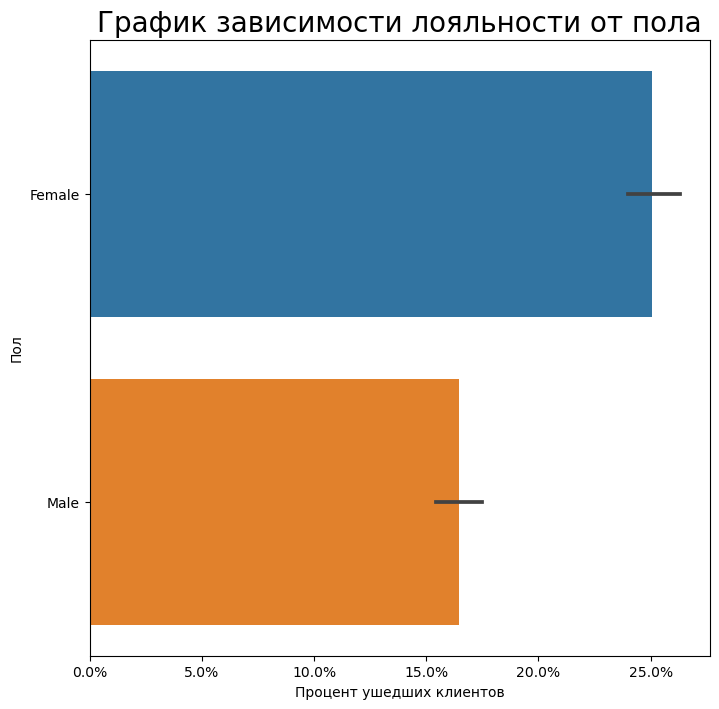

In [156]:
fig,ax = plt.subplots(figsize = (8,8))
sns.barplot(x='Exited',y='Gender',data = churn_data, estimator=np.mean)
ax.set_xlabel('Процент ушедших клиентов')
ax.set_ylabel('Пол')
ax.set_title('График зависимости лояльности от пола', fontsize = 20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

### Выводы по графику:
Женщины уходят чаще, чем мужчины. Стоит запустить промо-компанию ориентированную на женщин. 

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [157]:
# Создаю сводную таблицу по количеству продуктов банка
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 'Лояльные клиенты' if x==0 else 'Ушедшие клиенты')
churn_data_1  = churn_data.groupby(['NumOfProducts','Exited'],as_index=False).count()
churn_data_1.head(12)


,NumOfProducts,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
0,1,Лояльные клиенты,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675
1,1,Ушедшие клиенты,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409,1409
2,2,Лояльные клиенты,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242
3,2,Ушедшие клиенты,348,348,348,348,348,348,348,348,348,348,348,348
4,3,Лояльные клиенты,46,46,46,46,46,46,46,46,46,46,46,46
5,3,Ушедшие клиенты,220,220,220,220,220,220,220,220,220,220,220,220
6,4,Ушедшие клиенты,60,60,60,60,60,60,60,60,60,60,60,60


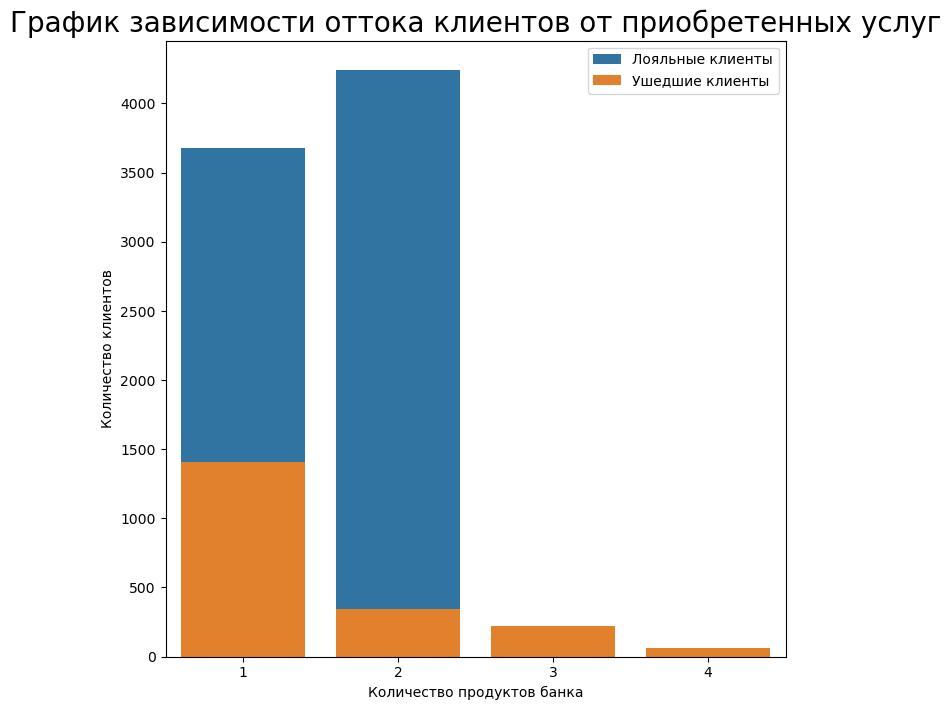

In [158]:
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot('NumOfProducts','RowNumber','Exited' ,data = churn_data_1,dodge=False)
ax.set_xlabel('Количество продуктов банка')
ax.set_ylabel('Количество клиентов')
plt.title('График зависимости оттока клиентов от приобретенных услуг', fontsize = 20)
ax.legend()
plt.show()



### Выводы по графику:
Большая часть лояльных клиентов ипользуют 1-2 продукта банка. 3-4 продукта использовали только ушедшие клиенты. Большая часть ушедших клиентов использовала 1 продукт. Возможно это была разовая акция с выгодными процентами по кредиту(например)и после ее окончания пользователи не стали оставаться клиентами банка (не завели дебетовую карту).

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [159]:
# Меняю значения в столбце IsActiveMember на более удобные для чтения и группирую таблицу по необходимым признакам
churn_data['IsActiveMember']=churn_data['IsActiveMember'].apply(lambda x: 'Неактивный' if x==0 else 'Активный')
churn_data_2  = churn_data.groupby(['IsActiveMember','Exited'],as_index=False).count()
churn_data_2.head(12)

,IsActiveMember,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
0,Активный,Лояльные клиенты,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416,4416
1,Активный,Ушедшие клиенты,735,735,735,735,735,735,735,735,735,735,735,735
2,Неактивный,Лояльные клиенты,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547
3,Неактивный,Ушедшие клиенты,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302,1302


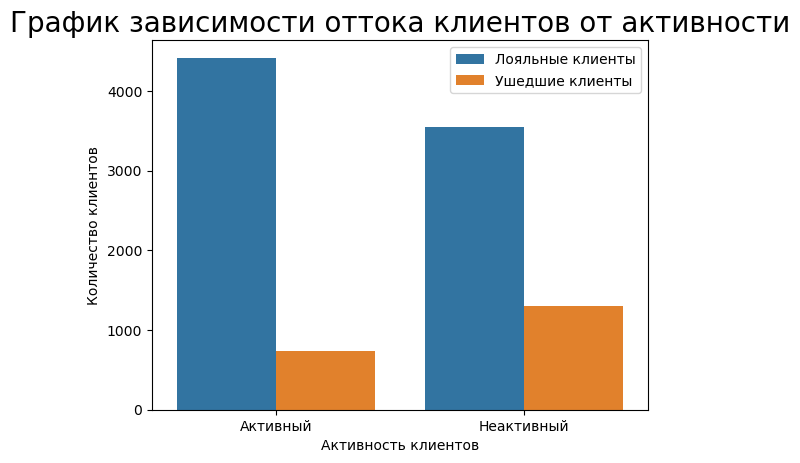

In [160]:
fig,ax = plt.subplots()
sns.barplot('IsActiveMember','RowNumber','Exited' ,data = churn_data_2)
ax.set_xlabel('Активность клиентов')
ax.set_ylabel('Количество клиентов')
plt.title('График зависимости оттока клиентов от активности', fontsize = 20)
ax.legend()
plt.show()

### Выводы по графику:
Неактивных пользователей ушло больше, чем активных. Банк может улучшить условия по дебетовым картам, для того чтобы клиенты чаще пользовались услугами банка.

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [161]:
churn_data_3 = churn_data.groupby(['Geography','Exited'],as_index=False).count()
churn_data_3.head(6)

,Geography,Exited,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Лояльные клиенты,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204,4204
1,France,Ушедшие клиенты,810,810,810,810,810,810,810,810,810,810,810,810
2,Germany,Лояльные клиенты,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695
3,Germany,Ушедшие клиенты,814,814,814,814,814,814,814,814,814,814,814,814
4,Spain,Лояльные клиенты,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064,2064
5,Spain,Ушедшие клиенты,413,413,413,413,413,413,413,413,413,413,413,413


### Как можно увидеть из таблицы соотношение лояльных и ушедших клиентов по странам разное
1.  Во Франции обслуживается наибольшее количество людей(можно сделать вывод, что банк изначально французский) и соотношение лояльных клиентов к ушедшим составляет примерно 5:1.
2. В Германии и Испании колличество клиентов схожее, но соотношение отличается. В германии 2:1, а у Испании 5:1.

Можно сдлеать вывод, что в рамках отдельной страны самый большой отток произошел именно в Германии. 

In [162]:
churn_data_3 = churn_data_3[churn_data_3['Exited']=='Ушедшие клиенты']
cr = px.choropleth(churn_data_3,locations='Geography',locationmode= 'country names',color = 'RowNumber',title='График зависимости лояльности от страны')
cr.write_html('cr.html')
cr.show()

### Выводы по графику:
По графику видно, что наибольшее количество клиентов ушло из Франции и Германии(2 богатейших стран ЕС). Можно предположить, что на на такое решение клиентов мог повлиять экономический кризис с изменинем процентной ставки. Так как в каждой стране ставку регулирует отдельный Центральный банк соотвественно и на клинтах это сказывается по разному. 
В самой сложной ситуации оказался банк в Германии. 

## 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

## Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

## На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [163]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


In [164]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data.head()  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Активный,101348.88,Ушедшие клиенты,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Активный,112542.58,Лояльные клиенты,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Неактивный,113931.57,Ушедшие клиенты,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,Неактивный,93826.63,Лояльные клиенты,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Активный,79084.10,Лояльные клиенты,Excellent


In [165]:
churn_data['Exited']=churn_data['Exited'].apply(lambda x: 0 if x == 'Лояльные клиенты' else 1)

In [166]:
# Строю сводную таблицу
pv_t = pd.pivot_table(churn_data,'Exited','CreditScoreCat','Tenure','mean')
pv_t.head()

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


In [167]:
heat_m = px.imshow(pv_t, title='График зависимости лояльности от кредитного рейтинга и времени в банке',labels={'x': 'Сколько лет используются услуги банка','y': 'Кредитный рейтинг'})
heat_m.write_html('heat_m.html')
heat_m.show()



### Выводы по графику:
#### По графику можно сделать выводы:
1. Чаще всего уходят клиенты с кредитным рейтингом 'Very poor', пользующиеся услугами банка менее года и 10 лет.
2. Клиенты со средним кредитным рейтингов уходят относительно редко вне зависимости от времени.
3. Клиенты с лучшим кредитным рейтингом уходят либо меньше чем через год либо через 9-10 лет.
Банку стоит сформировать программу лояльности ориентированную на новичков и на старых клиентов.
